## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
data["Mouse ID"].nunique()


249

In [12]:
data[data["Timepoint"] == 0].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [23]:
time_data = data.groupby("Timepoint")
time_data["Mouse ID"].value_counts

#non_unique = [n for time_data["Mouse ID"] if time_data["Mouse ID"]]

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000289F95FFFD0>>


In [27]:
data[data["Mouse ID"] == "z969"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [45]:
test = data[data["Timepoint"] == 15]["Mouse ID"].value_counts()
test[test > 1]

g989    2
Name: Mouse ID, dtype: int64

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for time in data["Timepoint"].unique():
    counts = data[data["Timepoint"] == time]["Mouse ID"].value_counts()
    non_uniques = counts[counts > 1]
    print(non_uniques)
    
    
#     df_time = data[data["Timepoint"] = time]
#     for i in df_time["Mouse ID"]:
        
    


g989    2
Name: Mouse ID, dtype: int64
g989    2
Name: Mouse ID, dtype: int64
g989    2
Name: Mouse ID, dtype: int64
g989    2
Name: Mouse ID, dtype: int64
g989    2
Name: Mouse ID, dtype: int64
Series([], Name: Mouse ID, dtype: int64)
Series([], Name: Mouse ID, dtype: int64)
Series([], Name: Mouse ID, dtype: int64)
Series([], Name: Mouse ID, dtype: int64)
Series([], Name: Mouse ID, dtype: int64)


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data["Mouse ID"] != "g989"]

In [53]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped = clean_data.groupby("Drug Regimen")
tumor = grouped["Tumor Volume (mm3)"]

summary_table = {#"Regimen": summary.index,
                "Mean": tumor.mean(),
                "Median": tumor.median(),
                "Variance": tumor.var(),
                "Standard Deviation": tumor.std(),
                "SEM": tumor.sem()}

summary = pd.DataFrame(summary_table)
summary["Regimen"] = summary.index
summary.head()

,Mean,Median,Variance,Standard Deviation,SEM,Regimen
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,Capomulin
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,Ceftamin
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,Infubinol
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,Ketapril
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,Naftisol


## Bar and Pie Charts

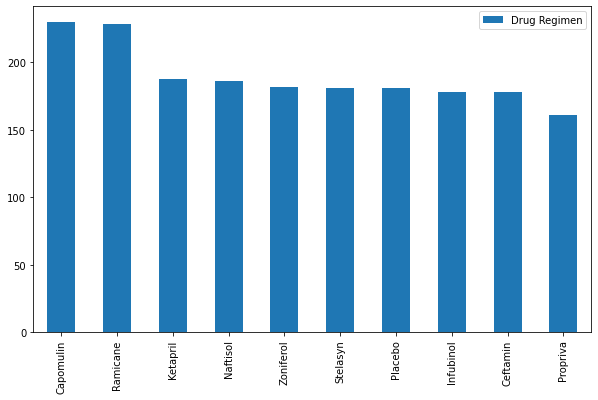

In [85]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_num = pd.DataFrame(clean_data["Drug Regimen"].value_counts())

fig, ax = plt.subplots(figsize = (10, 6))
mice_num.plot(kind="bar", ax=ax)


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

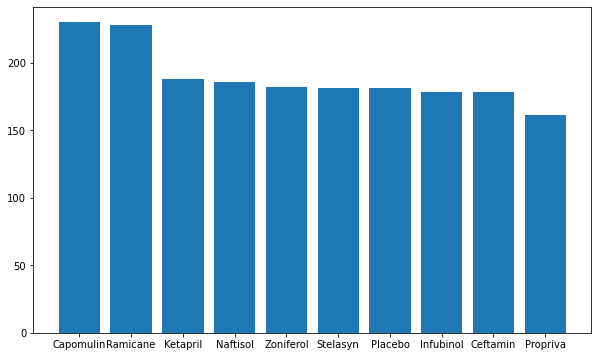

In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig_bar, ax_bar = plt.subplots(figsize = (10, 6))
x_axis = clean_data["Drug Regimen"].unique()
y_axis = clean_data["Drug Regimen"].value_counts()

ax_bar.bar(y_axis.index, y_axis)
y_axis


,Sex
Male,958
Female,935


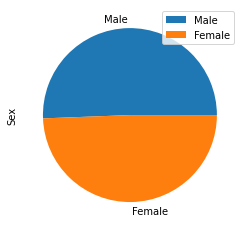

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(clean_data["Sex"].value_counts())
fig_pie_pd, ax_pie_pd = plt.subplots()
gender.plot(y="Sex",kind="pie", ax=ax_pie_pd)
gender.head()

<ipython-input-92-04ee2bebcdf8>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax_pie.pie(gender)


([<matplotlib.patches.Wedge at 0x2898ff12c40>,
 [Text(-0.02099250347258543, 1.0997996703027118, ''),
  Text(0.020992503472585782, -1.0997996703027118, '')])

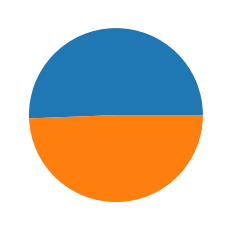

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig_pie, ax_pie = plt.subplots()
ax_pie.pie(gender)


## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


max_data = clean_data.copy()
    
i = 0
while True:
    if len(max_data) <= i +1:
        break
    
    curr_max = max_data["Timepoint"][i]
    next_max = max_data["Timepoint"][i + 1]
    if curr_max < next_max:
        max_data = max_data.drop(i)
        #print(len(max_data))
        max_data = max_data.reset_index(drop=True)
    else:
        i += 1


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [224]:
    
# Capomulin, Ramicane, Infubinol, and Ceftamin
reg = max_data["Drug Regimen"]

cap = max_data[reg == "Capomulin"]
ram = max_data[reg == "Ramicane"]
inf = max_data[reg == "Infubinol"]
cef = max_data[reg == "Ceftamin"]

reg_comb = pd.merge(cap, ram, how="outer")
reg_comb = pd.merge(reg_comb, inf, how="outer")
reg_comb = pd.merge(reg_comb, cef, how="outer")

reg_comb["Drug Regimen"].value_counts()
cap.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3


In [172]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = reg_comb['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

low_outliers = reg_comb[reg_comb["Tumor Volume (mm3)"] < lower_bound]
high_outliers = reg_comb[reg_comb["Tumor Volume (mm3)"] > upper_bound]

print(high_outliers)
print(low_outliers)


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [213]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
by_treatment = reg_comb.groupby("Drug Regimen")

quartilesT = by_treatment['Tumor Volume (mm3)'].quantile([.25,.5,.75])

q_T = pd.DataFrame(quartilesT).reset_index()
#q_T = q_T.groupby("Drug Regimen")

# print(q_T)

stuff = []

for drug in q_T["Drug Regimen"].unique():
        curr_reg = q_T[q_T["Drug Regimen"] == drug]
        curr_lower = float(curr_reg[curr_reg["level_1"] == .25]["Tumor Volume (mm3)"])
        curr_upper = float(curr_reg[curr_reg["level_1"] == .75]["Tumor Volume (mm3)"])
        curr_mid = float(curr_reg[curr_reg["level_1"] == .50]["Tumor Volume (mm3)"])
        curr_iqr = curr_upper - curr_lower
        curr_dict = {"Drug": drug, "LowerQ": curr_lower, "UpperQ": curr_upper, "IQR": curr_iqr, "Mid": curr_mid}
        stuff.append(curr_dict)

stuff2 = pd.DataFrame(stuff)

stuff2 

,Drug,LowerQ,UpperQ,IQR,Mid
0,Capomulin,32.377357,40.159220,7.781863,38.125164
1,Ceftamin,48.722078,64.299830,15.577752,59.851956
2,Infubinol,54.048608,65.525743,11.477135,60.165180
3,Ramicane,31.560470,40.659006,9.098537,36.561652


In [216]:
for treatment in stuff2["Drug"]:
    iqr_curr = float(stuff2[stuff2["Drug"] == treatment]["IQR"])
    low_curr = float(stuff2[stuff2["Drug"] == treatment]["LowerQ"])
    high_curr = float(stuff2[stuff2["Drug"] == treatment]["UpperQ"])
    
    low_bound = low_curr - 1.5 * iqr_curr
    high_bound = high_curr + 1.5 * iqr_curr
    
    curr_frame = reg_comb[reg_comb["Drug Regimen"] == treatment]
    low_outs = curr_frame[curr_frame["Tumor Volume (mm3)"] < low_bound]
    high_outs = curr_frame[curr_frame["Tumor Volume (mm3)"] > high_bound]
    
#     low_outs = reg_comb[reg_comb[reg_comb["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] < low_bound]
#     high_outs = reg_comb[reg_comb[reg_comb["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] > high_bound]
    
    if len(low_outs) > 0:
        print(low_outs)
    if len(high_outs) > 0:
        print(high_outs)

# cap_iqr = float(stuff2[stuff2["Drug"] == "Capomulin"]["IQR"])
# cap_lower = float(stuff2[stuff2["Drug"] == "Capomulin"]["LowerQ"])
# cap_upper = float(stuff2[stuff2["Drug"] == "Capomulin"]["UpperQ"])

# cap[cap["Tumor Volume (mm3)"] < (cap_lower - 1.5*cap_iqr)]
# cap[cap["Tumor Volume (mm3)"] > (cap_upper + 1.5*cap_iqr)]

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
55     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
55           36.321346                 0  


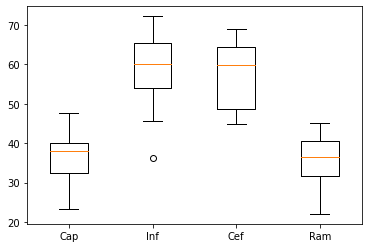

In [223]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

ax1.boxplot([cap["Tumor Volume (mm3)"], inf["Tumor Volume (mm3)"], cef["Tumor Volume (mm3)"], ram["Tumor Volume (mm3)"]],
           labels=["Cap", "Inf", "Cef", "Ram"]);


## Line and Scatter Plots

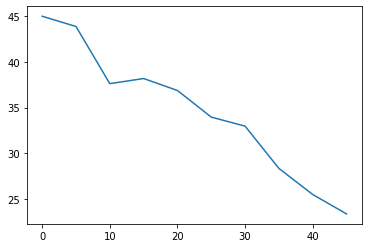

In [225]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


s185_data = clean_data[clean_data["Mouse ID"] == "s185"]
x_axis = s185_data["Timepoint"]
y_axis = s185_data["Tumor Volume (mm3)"]

fig_line, ax_line = plt.subplots()
ax_line.plot(x_axis, y_axis)


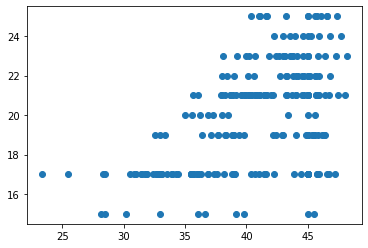

In [226]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regime
full_cap = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
x_scatter = full_cap["Tumor Volume (mm3)"]
y_scatter = full_cap["Weight (g)"]

fig_scatter, ax_scatter = plt.subplots()
ax_scatter.scatter(x_scatter, y_scatter)


## Correlation and Regression

In [230]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(
    x_scatter, y_scatter)
# aa_fit = aa_slope * year + aa_int

print(slope)
print(r)
print(p)

0.2875853579447793
0.5256995552077166
9.605446629502282e-18
